In [1]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
#la prima mi serve a riscalare le z in base alla cella in cui passa
#la seconda serve a riscalare le z in base al detector in cui passa
local_z_shifts = [z*ZCELL for z  in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

print(local_z_shifts)

[0.0, 13.0, 26.0, 39.0]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from os import listdir
%matplotlib inline
from itertools import combinations
import random
from scipy import stats

In [43]:
'''ERRORE SISTEMATICO NEL POSIZIONAMENTO DELLE CAMERE'''

def read_data(event):    
    event_number = int(event[0])
    hits_number  = int(event[1])
    hit       = np.arange(hits_number)
    chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
    layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
    xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
    xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
    z_local   = np.fromiter((local_z_shifts[i-1]+ZCELL/2 for i in layer), float)
    time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
    xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
    xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
    z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
    dataframe = pd.DataFrame(
        { 'EvNumber' : event_number,
          'Hit'      : hit,
          'Chamber'  : chamber,
          'Layer'    : layer,
          'XL_local' : xl_local,
          'XR_local' : xr_local,
          'Z_local'  : z_local,
          'Time'     : time,
          'XL_global': xl_global,
          'XR_global': xr_global,
          'Z_global' : z_global,
        })
    #dataframe.set_index('Hit', inplace=True) # set as index the number of the hit 
    return dataframe, event_number, hits_number

n_h=[]
count=0
selezionati=0
for i in listdir("/Users/federicob/Documents/data/calibration/Run000260"):
    file="/Users/federicob/Documents/data/calibration/Run000260"+"/"+i
    
    with open(file) as f:
        for line in f:
            event = line.split()
    
            dataframe, event_number, hits_number=read_data(event)
            n_h.append(hits_number)
            if (hits_number>=6 and hits_number<=16):
                selezionati +=1
            if (hits_number>=1):
                count +=1
            
    
    



######## 61.12145665218291


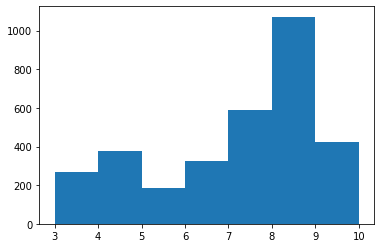

In [44]:
plt.hist(n_h,bins=[i for i in range(3,11)])
print("########",selezionati/count *100)



(array([3.349e+03, 3.210e+02, 1.950e+02, 2.670e+02, 3.780e+02, 1.870e+02,
        3.240e+02, 5.870e+02, 1.072e+03, 2.750e+02, 1.480e+02, 1.430e+02,
        1.000e+02, 9.500e+01, 8.200e+01, 7.400e+01, 5.400e+01, 4.900e+01,
        4.000e+01, 3.800e+01, 4.000e+01, 2.300e+01, 2.800e+01, 1.900e+01,
        2.300e+01, 2.200e+01, 2.100e+01, 2.200e+01, 2.000e+01, 1.100e+01,
        1.000e+01, 9.000e+00, 1.300e+01, 1.200e+01, 8.000e+00, 7.000e+00,
        5.000e+00, 1.200e+01, 1.000e+01, 0.000e+00, 5.000e+00, 6.000e+00,
        8.000e+00, 7.000e+00, 9.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array

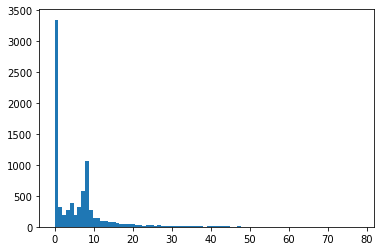

In [38]:
plt.hist(n_h, bins=80)